In [248]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Logistic Regression

In [229]:
def sigma(z):
    return(1 / (1 + np.exp(-z)))

**For one sample tuple**

In [222]:
def LogRegCompute(x_1, x_2, w_1, w_2, b, alpha,y):
    def compute_da(y,a):
        da = -(y/a)+(1-y)/(1-a)
        return da
    def compute_dz(da,a):
        dz = da*a*(1-a)
        return dz
    def compute_d(dz, x=1):
        d = dz * x
        return d
    
    z = w_1*x_1 + w_2*x_2 + b
    a = sigma(z)
    
    da = compute_dz(y,a)
    dz = compute_dz(da,a)
    
    dw1 = compute_d(dz, x_1)
    dw2 = compute_d(dz, x_2)
    db = compute_d(dz)
    
    w_1 = w_1 + alpha*dw1
    w_2 = w_2 + alpha*dw2
    b = b + alpha*db
    return(w_1,w_2,b)

In [225]:
LogRegCompute(1,2,0,0,1,0.01,2)

(0.0007731250458590582, 0.0015462500917181165, 1.0007731250458591)

**For m samples, single step**

In [237]:
m = 1000
J_array, b = np.zeros((m,1)), 0

np.random.seed(197)


w = np.zeros((1,2))
x_1 = np.random.randint(10, size = m).reshape(-1,m)
x_2 = np.random.randint(low = 25, high = 50, size = m).reshape(-1,m)
x = np.array([x_1,x_2]).reshape(2,m)

y = np.where(((x[1]<37.5) & (x[0]>5)), 1, 0)

for i in range(1000):
    z = np.zeros(m)
    a = np.zeros(m)

    z = np.dot(w,x) + b
    a = sigma(z)
    J = (-(y * np.log(a) + (1-y)* np.log(1-a))).mean()
    dz = a - y
    dw = (np.dot(x,dz.T).reshape(-1,2))/m
    db = dz.mean()
    w = w - alpha * dw
    b = b - alpha * db
    J_array[i] = J 

print(J_array[m-1])

[0.16131403]


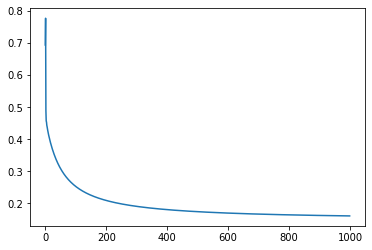

In [249]:
plt.plot(J_array)